## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

In [2]:
file=pd.read_csv('../data/quantile_normalized.csv')

In [3]:
X=file.drop(columns=["FIPS","State","County","q_countycode"],axis=1)

In [4]:
X.head()

q_Years of Potential Life Lost Rate  q_% Fair or Poor Health  \
0                             0.519452                 0.745536   
1                             0.410077                 0.525191   
2                             0.791454                 0.981505   
3                             0.920281                 0.654974   
4                             0.884566                 0.798151   

   q_Average Number of Physically Unhealthy Days  \
0                                       0.851403   
1                                       0.659439   
2                                       0.969707   
3                                       0.801658   
4                                       0.882653   

   q_Average Number of Mentally Unhealthy Days  q_% Low Birthweight  \
0                                     0.788584             0.683992   
1                                     0.588967             0.634566   
2                                     0.956314             0.931441   
3                                     0.734375             0.874043   
4                                     0.889031             0.465561   

   q_% Smokers  q_Food Environment Index  q_% Physically Inactive  \
0     0.606505                  0.327009                 0.897481   
1     0.554209                  0.658482                 0.441327   
2     0.894133                  0.066805                 0.247290   
3     0.699617                  0.565370                 0.861448   
4     0.707270                  0.824936                 0.706952   

   q_% With Access to Exercise Opportunities  q_% Excessive Drinking  ...  \
0                                   0.556441                0.228316  ...   
1                                   0.632653                0.548151  ...   
2                                   0.306760                0.068878  ...   
3                                   0.049426                0.275191  ...   
4                                   0.048788                0.164860  ...   

   q_% Diagnosed Diabetes  q_% Nonwhite  q_% households wo car  \
0                0.659120      0.747768               0.499043   
1                0.280931      0.598852               0.154974   
2                0.895408      0.947704               0.873724   
3                0.728476      0.749681               0.539222   
4                0.728476      0.219707               0.240115   

   q_Number of Hospitals  q_% disabled  q_% Without Health Insurance  \
0               0.414700      0.794324                      0.457589   
1               0.877551      0.357781                      0.677774   
2               0.414700      0.907685                      0.694675   
3               0.414700      0.612085                      0.499203   
4               0.414700      0.382812                      0.729432   

   q_% Limited English Proficiency  q_% workers commuting by public transit  \
0                         0.427615                                 0.271292   
1                         0.643176                                 0.271292   
2                         0.652423                                 0.485327   
3                         0.439732                                 0.641467   
4                         0.650510                                 0.271292   

   q_% Veterans in Civilian Adult Population  q_opioid death rate  
0                                   0.908801             0.129783  
1                                   0.897003             0.072385  
2                                   0.298788             0.421237  
3                                   0.225287             0.464286  
4                                   0.464764             0.122449  

[5 rows x 91 columns]

In [5]:
X.shape

(3136, 91)

## Checking if all data types are numerical

In [10]:
set(X.dtypes.tolist())

{dtype('float64')}

### Column details

In [11]:
X.describe()

q_Years of Potential Life Lost Rate  q_% Fair or Poor Health  \
count                          3136.000000              3136.000000   
mean                              0.500159                 0.500159   
std                               0.288610                 0.288721   
min                               0.045918                 0.000319   
25%                               0.250239                 0.250239   
50%                               0.500159                 0.500159   
75%                               0.750080                 0.750080   
max                               1.000000                 1.000000   

       q_Average Number of Physically Unhealthy Days  \
count                                    3136.000000   
mean                                        0.500159   
std                                         0.288721   
min                                         0.000319   
25%                                         0.250239   
50%                                         0.500159   
75%                                         0.750080   
max                                         1.000000   

       q_Average Number of Mentally Unhealthy Days  q_% Low Birthweight  \
count                                  3136.000000          3136.000000   
mean                                      0.500159             0.500159   
std                                       0.288721             0.288716   
min                                       0.000319             0.016263   
25%                                       0.250239             0.250239   
50%                                       0.500159             0.500159   
75%                                       0.750080             0.750080   
max                                       1.000000             1.000000   

       q_% Smokers  q_Food Environment Index  q_% Physically Inactive  \
count  3136.000000               3136.000000              3136.000000   
mean      0.500159                  0.500159                 0.500159   
std       0.288721                  0.288559                 0.288716   
min       0.000319                  0.003348                 0.000319   
25%       0.250239                  0.242188                 0.251754   
50%       0.500159                  0.480548                 0.496652   
75%       0.750080                  0.748884                 0.752232   
max       1.000000                  1.000000                 1.000000   

       q_% With Access to Exercise Opportunities  q_% Excessive Drinking  ...  \
count                                3136.000000             3136.000000  ...   
mean                                    0.500159                0.500159  ...   
std                                     0.288720                0.288721  ...   
min                                     0.003348                0.000319  ...   
25%                                     0.250239                0.250239  ...   
50%                                     0.500159                0.500159  ...   
75%                                     0.750080                0.750080  ...   
max                                     0.991071                1.000000  ...   

       q_% Diagnosed Diabetes  q_% Nonwhite  q_% households wo car  \
count             3136.000000   3136.000000            3136.000000   
mean                 0.500159      0.500159               0.500159   
std                  0.288707      0.288721               0.288721   
min                  0.000319      0.000319               0.001435   
25%                  0.245695      0.250239               0.250239   
50%                  0.504943      0.500159               0.500159   
75%                  0.750478      0.750080               0.750080   
max                  1.000000      1.000000               1.000000   

       q_Number of Hospitals  q_% disabled  q_% Without Health Insurance  \
count            3136.000000   3136.000000                   3136.000000   
mean           

In [12]:
# Checking for presence of null values in any column

null_col=X.columns[X.isnull().any()].tolist()  
if len(null_col)>0:
    print(null_col)
else:
    print(" No null columns found")

['q_% workers commuting by public transit']


In [13]:
for val in null_col:
    print("The {} column has {} missing values".format(val,X[val].isnull().sum()))

The q_% workers commuting by public transit column has 1 missing values


In [14]:
X=X.dropna()

In [15]:
#listing all the columns with type str
for val in X.columns:
    if type(X[val][0])==str:
        print(val)

# Variance threshold to drop low variance data

In [9]:
def Drop(l1, l2): 
    dif = [i for i in l1  if i not in l2] 
    return dif 

In [10]:
"""feature_drop={}

for th in range(0,50,5):
    thresh = VarianceThreshold(threshold=th)
    thresh.fit(X)
    dropped_list=Drop(X.columns.tolist(),X.columns[thresh.get_support()].tolist())
    feature_drop[th]=(dropped_list,len(dropped_list))
    print("For threshold of {} the number of features dropped are {}".format(th,len(dropped_list)))
         """



'feature_drop={}\n\nfor th in range(0,50,5):\n    thresh = VarianceThreshold(threshold=th)\n    thresh.fit(X)\n    dropped_list=Drop(X.columns.tolist(),X.columns[thresh.get_support()].tolist())\n    feature_drop[th]=(dropped_list,len(dropped_list))\n    print("For threshold of {} the number of features dropped are {}".format(th,len(dropped_list)))\n         '

### Since data is normalized so it does not contain lagre variance. SO variance threshold is not helpful

###  [       { " Threshold Value" :  (  [ 'Dropped features']  ,  'number of dropped features')  }  , ..........  ]

# Correlation Matrix

In [16]:
X

q_Years of Potential Life Lost Rate  q_% Fair or Poor Health  \
0                                0.519452                 0.745536   
1                                0.410077                 0.525191   
2                                0.791454                 0.981505   
3                                0.920281                 0.654974   
4                                0.884566                 0.798151   
...                                   ...                      ...   
3131                             0.482462                 0.296237   
3132                             0.091837                 0.060587   
3133                             0.406888                 0.355548   
3134                             0.293048                 0.393495   
3135                             0.166135                 0.220026   

      q_Average Number of Physically Unhealthy Days  \
0                                          0.851403   
1                                          0.659439   
2                                          0.969707   
3                                          0.801658   
4                                          0.882653   
...                                             ...   
3131                                       0.218112   
3132                                       0.075574   
3133                                       0.325893   
3134                                       0.317283   
3135                                       0.247768   

      q_Average Number of Mentally Unhealthy Days  q_% Low Birthweight  \
0                                        0.788584             0.683992   
1                                        0.588967             0.634566   
2                                        0.956314             0.931441   
3                                        0.734375             0.874043   
4                                        0.889031             0.465561   
...                                           ...                  ...   
3131                                     0.196747             0.825893   
3132                                     0.053571             0.497449   
3133                                     0.217156             0.860013   
3134                                     0.222895             0.331633   
3135                                     0.212054             0.234056   

      q_% Smokers  q_Food Environment Index  q_% Physically Inactive  \
0        0.606505                  0.327009                 0.897481   
1        0.554209                  0.658482                 0.441327   
2        0.894133                  0.066805                 0.247290   
3        0.699617                  0.565370                 0.861448   
4        0.707270                  0.824936                 0.706952   
...           ...                       ...                      ...   
3131     0.605548                  0.522640                 0.333705   
3132     0.202168                  0.748884                 0.002232   
3133     0.529337                  0.400032                 0.496652   
3134     0.492028                  0.787468                 0.573501   
3135     0.475128                  0.610013                 0.471939   

      q_% With Access to Exercise Opportunities  q_% Excessive Drinking  ...  \
0                                      0.556441                0.228316  ...   
1                                      0.632653                0.548151  ...   
2                                      0.306760                0.068878  ...   
3                                      0.049426                0.275191  ...   
4                                      0.048788                0.164860  ...   
...                                         ...                     ...  ...   
3131                                   0.881059                0.955676  ...   
3132                                   0.978635                0.990115  ...   
3133                          

In [17]:
Correlation_Matrix=X.corr().abs()
Correlation_Matrix

q_Years of Potential Life Lost Rate  \
q_Years of Potential Life Lost Rate                                       1.000000   
q_% Fair or Poor Health                                                   0.700893   
q_Average Number of Physically Unhealthy Days                             0.711581   
q_Average Number of Mentally Unhealthy Days                               0.696520   
q_% Low Birthweight                                                       0.589446   
...                                                                            ...   
q_% Without Health Insurance                                              0.262342   
q_% Limited English Proficiency                                           0.198645   
q_% workers commuting by public transit                                   0.117818   
q_% Veterans in Civilian Adult Population                                 0.005836   
q_opioid death rate                                                       0.032074   

                                               q_% Fair or Poor Health  \
q_Years of Potential Life Lost Rate                           0.700893   
q_% Fair or Poor Health                                       1.000000   
q_Average Number of Physically Unhealthy Days                 0.901242   
q_Average Number of Mentally Unhealthy Days                   0.807294   
q_% Low Birthweight                                           0.598278   
...                                                                ...   
q_% Without Health Insurance                                  0.479385   
q_% Limited English Proficiency                               0.010931   
q_% workers commuting by public transit                       0.179398   
q_% Veterans in Civilian Adult Population                     0.196610   
q_opioid death rate                                           0.002009   

                                               q_Average Number of Physically Unhealthy Days  \
q_Years of Potential Life Lost Rate                                                 0.711581   
q_% Fair or Poor Health                                                             0.901242   
q_Average Number of Physically Unhealthy Days                                       1.000000   
q_Average Number of Mentally Unhealthy Days                                         0.938446   
q_% Low Birthweight                                                                 0.547479   
...                                                                                      ...   
q_% Without Health Insurance                                                        0.306017   
q_% Limited English Proficiency                                                     0.126591   
q_% workers commuting by public transit                                             0.140122   
q_% Veterans in Civilian Adult Population                                           0.085083   
q_opioid death rate                                                                 0.033490   

                                               q_Average Number of Mentally Unhealthy Days  \
q_Years of Potential Life Lost Rate                                               0.696520   
q_% Fair or Poor Health                                                           0.807294   
q_Average Number of Physically Unhealthy Days                                     0.938446   
q_Average Number of Mentally Unhealthy Days                                       1.000000   
q_% Low Birthweight                                                               0.530720   
...                                                                                    ...   
q_% Without Health Insurance                                                      0.173716   
q_% Limited English Proficiency                                                   0.176566   
q_% workers commuting by public transit                                           0.098564   
q_% Veterans in Civilian Adult P

## Simulating feature drop based on correlation matrix

In [18]:
# Select upper triangle of correlation matrix

feat_drop_corr=[]

for i in range(50,100,5):
    d={}
    coff=(i/100)
    upper = Correlation_Matrix.where(np.triu(np.ones(Correlation_Matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than some value
    to_drop = [column for column in upper.columns if any(upper[column] > coff)]

    # Drop features 
    X_new=X.drop(to_drop, axis=1, inplace=False)
    d[coff]=X_new.shape[-1] , to_drop
    feat_drop_corr.append(d)

In [19]:
feat_drop_corr

[{0.5: (25,
   ['q_% Fair or Poor Health',
    'q_Average Number of Physically Unhealthy Days',
    'q_Average Number of Mentally Unhealthy Days',
    'q_% Low Birthweight',
    'q_% Smokers',
    'q_Food Environment Index',
    'q_% Physically Inactive',
    'q_% Excessive Drinking',
    'q_Teen Birth Rate',
    'q_Primary Care Physicians Rate',
    'q_Dentist Rate',
    'q_% Some College',
    'q_% Unemployed',
    'q_% Children in Poverty',
    'q_Income Ratio',
    'q_% Single-Parent Households',
    'q_Injury Death Rate',
    'q_% Drive Alone to Work',
    'q_Life Expectancy',
    'q_Age-Adjusted Death Rate',
    'q_Infant Mortality Rate',
    'q_% Frequent Mental Distress',
    'q_HIV Prevalence Rate',
    'q_% Food Insecure',
    'q_% Limited Access to Healthy Foods',
    'q_Drug Overdose Mortality Rate',
    'q_Motor Vehicle Mortality Rate',
    'q_% Insufficient Sleep',
    'q_% Disconnected Youth',
    'q_Average Math Performance',
    'q_Median Household Income',
    'q_% En

###  [       { " Threshold Value" : 'number of remaining features' (  [ 'Dropped features']  ,)  }  , ..........  ]

In [20]:
X_new

q_Years of Potential Life Lost Rate  q_% Fair or Poor Health  \
0                                0.519452                 0.745536   
1                                0.410077                 0.525191   
2                                0.791454                 0.981505   
3                                0.920281                 0.654974   
4                                0.884566                 0.798151   
...                                   ...                      ...   
3131                             0.482462                 0.296237   
3132                             0.091837                 0.060587   
3133                             0.406888                 0.355548   
3134                             0.293048                 0.393495   
3135                             0.166135                 0.220026   

      q_Average Number of Physically Unhealthy Days  \
0                                          0.851403   
1                                          0.659439   
2                                          0.969707   
3                                          0.801658   
4                                          0.882653   
...                                             ...   
3131                                       0.218112   
3132                                       0.075574   
3133                                       0.325893   
3134                                       0.317283   
3135                                       0.247768   

      q_Average Number of Mentally Unhealthy Days  q_% Low Birthweight  \
0                                        0.788584             0.683992   
1                                        0.588967             0.634566   
2                                        0.956314             0.931441   
3                                        0.734375             0.874043   
4                                        0.889031             0.465561   
...                                           ...                  ...   
3131                                     0.196747             0.825893   
3132                                     0.053571             0.497449   
3133                                     0.217156             0.860013   
3134                                     0.222895             0.331633   
3135                                     0.212054             0.234056   

      q_% Smokers  q_Food Environment Index  q_% Physically Inactive  \
0        0.606505                  0.327009                 0.897481   
1        0.554209                  0.658482                 0.441327   
2        0.894133                  0.066805                 0.247290   
3        0.699617                  0.565370                 0.861448   
4        0.707270                  0.824936                 0.706952   
...           ...                       ...                      ...   
3131     0.605548                  0.522640                 0.333705   
3132     0.202168                  0.748884                 0.002232   
3133     0.529337                  0.400032                 0.496652   
3134     0.492028                  0.787468                 0.573501   
3135     0.475128                  0.610013                 0.471939   

      q_% With Access to Exercise Opportunities  q_% Excessive Drinking  ...  \
0                                      0.556441                0.228316  ...   
1                                      0.632653                0.548151  ...   
2                                      0.306760                0.068878  ...   
3                                      0.049426                0.275191  ...   
4                                      0.048788                0.164860  ...   
...                                         ...                     ...  ...   
3131                                   0.881059                0.955676  ...   
3132                                   0.978635                0.990115  ...   
3133                          

In [21]:
# for correlation 0.5

X_red=X.drop(feat_drop_corr[0][0.5][-1],axis=1)
X_red

q_Years of Potential Life Lost Rate  \
0                                0.519452   
1                                0.410077   
2                                0.791454   
3                                0.920281   
4                                0.884566   
...                                   ...   
3131                             0.482462   
3132                             0.091837   
3133                             0.406888   
3134                             0.293048   
3135                             0.166135   

      q_% With Access to Exercise Opportunities  \
0                                      0.556441   
1                                      0.632653   
2                                      0.306760   
3                                      0.049426   
4                                      0.048788   
...                                         ...   
3131                                   0.881059   
3132                                   0.978635   
3133                                   0.810268   
3134                                   0.797513   
3135                                   0.450574   

      q_% Driving Deaths with Alcohol Involvement  q_Chlamydia Rate  \
0                                        0.484853          0.666454   
1                                        0.623246          0.516582   
2                                        0.838807          0.900829   
3                                        0.507972          0.545281   
4                                        0.254783          0.305166   
...                                           ...               ...   
3131                                     0.723214          0.285714   
3132                                     0.333227          0.560906   
3133                                     0.272800          0.124522   
3134                                     0.272800          0.274713   
3135                                     0.838807          0.294962   

      q_% With Annual Mammogram  q_% Vaccinated  \
0                      0.516263        0.420918   
1                      0.618304        0.533323   
2                      0.711735        0.283482   
3                      0.460459        0.314094   
4                      0.192761        0.346779   
...                         ...             ...   
3131                   0.315370        0.420918   
3132                   0.569196        0.837851   
3133                   0.105708        0.205835   
3134                   0.086735        0.457589   
3135                   0.105708        0.039700   

      q_High School Graduation Rate  q_Social Association Rate  \
0                          0.521205                   0.576212   
1                          0.324936                   0.420281   
2                          0.154815                   0.204401   
3                          0.221779                   0.263393   
4                          0.739477                   0.269452   
...                             ...                        ...   
3131                       0.134088                   0.431122   
3132                       0.393335                   0.838967   
3133                       0.257653                   0.049745   
3134                       0.252232                   0.832270   
3135                       0.547353                   0.648597   

      q_Violent Crime Rate  q_Average Daily PM2.5  ...  \
0                 0.671237               0.950096  ...   
1                 0.528061               0.732462  ...   
2                 0.845026               0.926180  ...   
3                 0.209184               0.883929  ...   
4                 0.900191               0.950096  ...   
...                    ...                    ...  ...   
3131              0.715242               0.045759  ...   
3132              0.036193               0.036193  ...   
3133              0.167092               0.096142  ...   
3134         

In [23]:
X_red_corr=X_red.corr()
X_red_corr

q_Years of Potential Life Lost Rate  \
q_Years of Potential Life Lost Rate                                     1.000000   
q_% With Access to Exercise Opportunities                              -0.284746   
q_% Driving Deaths with Alcohol Involvement                            -0.009084   
q_Chlamydia Rate                                                        0.362688   
q_% With Annual Mammogram                                              -0.337854   
q_% Vaccinated                                                         -0.165640   
q_High School Graduation Rate                                          -0.096811   
q_Social Association Rate                                              -0.051618   
q_Violent Crime Rate                                                    0.284472   
q_Average Daily PM2.5                                                   0.352095   
q_Presence of Water Violation                                           0.017192   
q_% Severe Housing Problems                                             0.183606   
q_% Long Commute - Drives Alone                                         0.154962   
q_Child Mortality Rate                                                  0.418598   
q_% Children Uninsured                                                 -0.050065   
q_Other Primary Care Provider Ratio                                    -0.023011   
q_Average Reading Performance                                          -0.096911   
q_Suicide Rate (Age-Adjusted)                                           0.342488   
q_Juvenile Arrest Rate                                                 -0.024678   
q_% less than 18 years of age                                           0.046360   
q_% Native Hawaiian/Other Pacific Islander                             -0.079192   
q_% Female                                                              0.245345   
q_Hypertension Death Rate                                               0.340907   
q_% workers commuting by public transit                                -0.117818   
q_% Veterans in Civilian Adult Population                              -0.005836   

                                             q_% With Access to Exercise Opportunities  \
q_Years of Potential Life Lost Rate                                          -0.284746   
q_% With Access to Exercise Opportunities                                     1.000000   
q_% Driving Deaths with Alcohol Involvement                                   0.060762   
q_Chlamydia Rate                                                              0.149765   
q_% With Annual Mammogram                                                     0.212607   
q_% Vaccinated                                                                0.321757   
q_High School Graduation Rate                                                -0.134427   
q_Social Association Rate                                                    -0.022210   
q_Violent Crime Rate                                                          0.183778   
q_Average Daily PM2.5                                                        -0.068615   
q_Presence of Water Violation                                                 0.075784   
q_% Severe Housing Problems                                                   0.249998   
q_% Long Commute - Drives Alone                                              -0.211617   
q_Child Mortality Rate                                                        0.061096   
q_% Children Uninsured                                                       -0.281536   
q_Other Primary Care Provider Ratio                                           0.037516   
q_Average Reading Performance                                                 0.053511   
q_Suicide Rate (Age-Adjusted)                                                 0.086742   
q_Juvenile Arrest Rate                                                        0.262052   
q_% less than 18 years of age                               

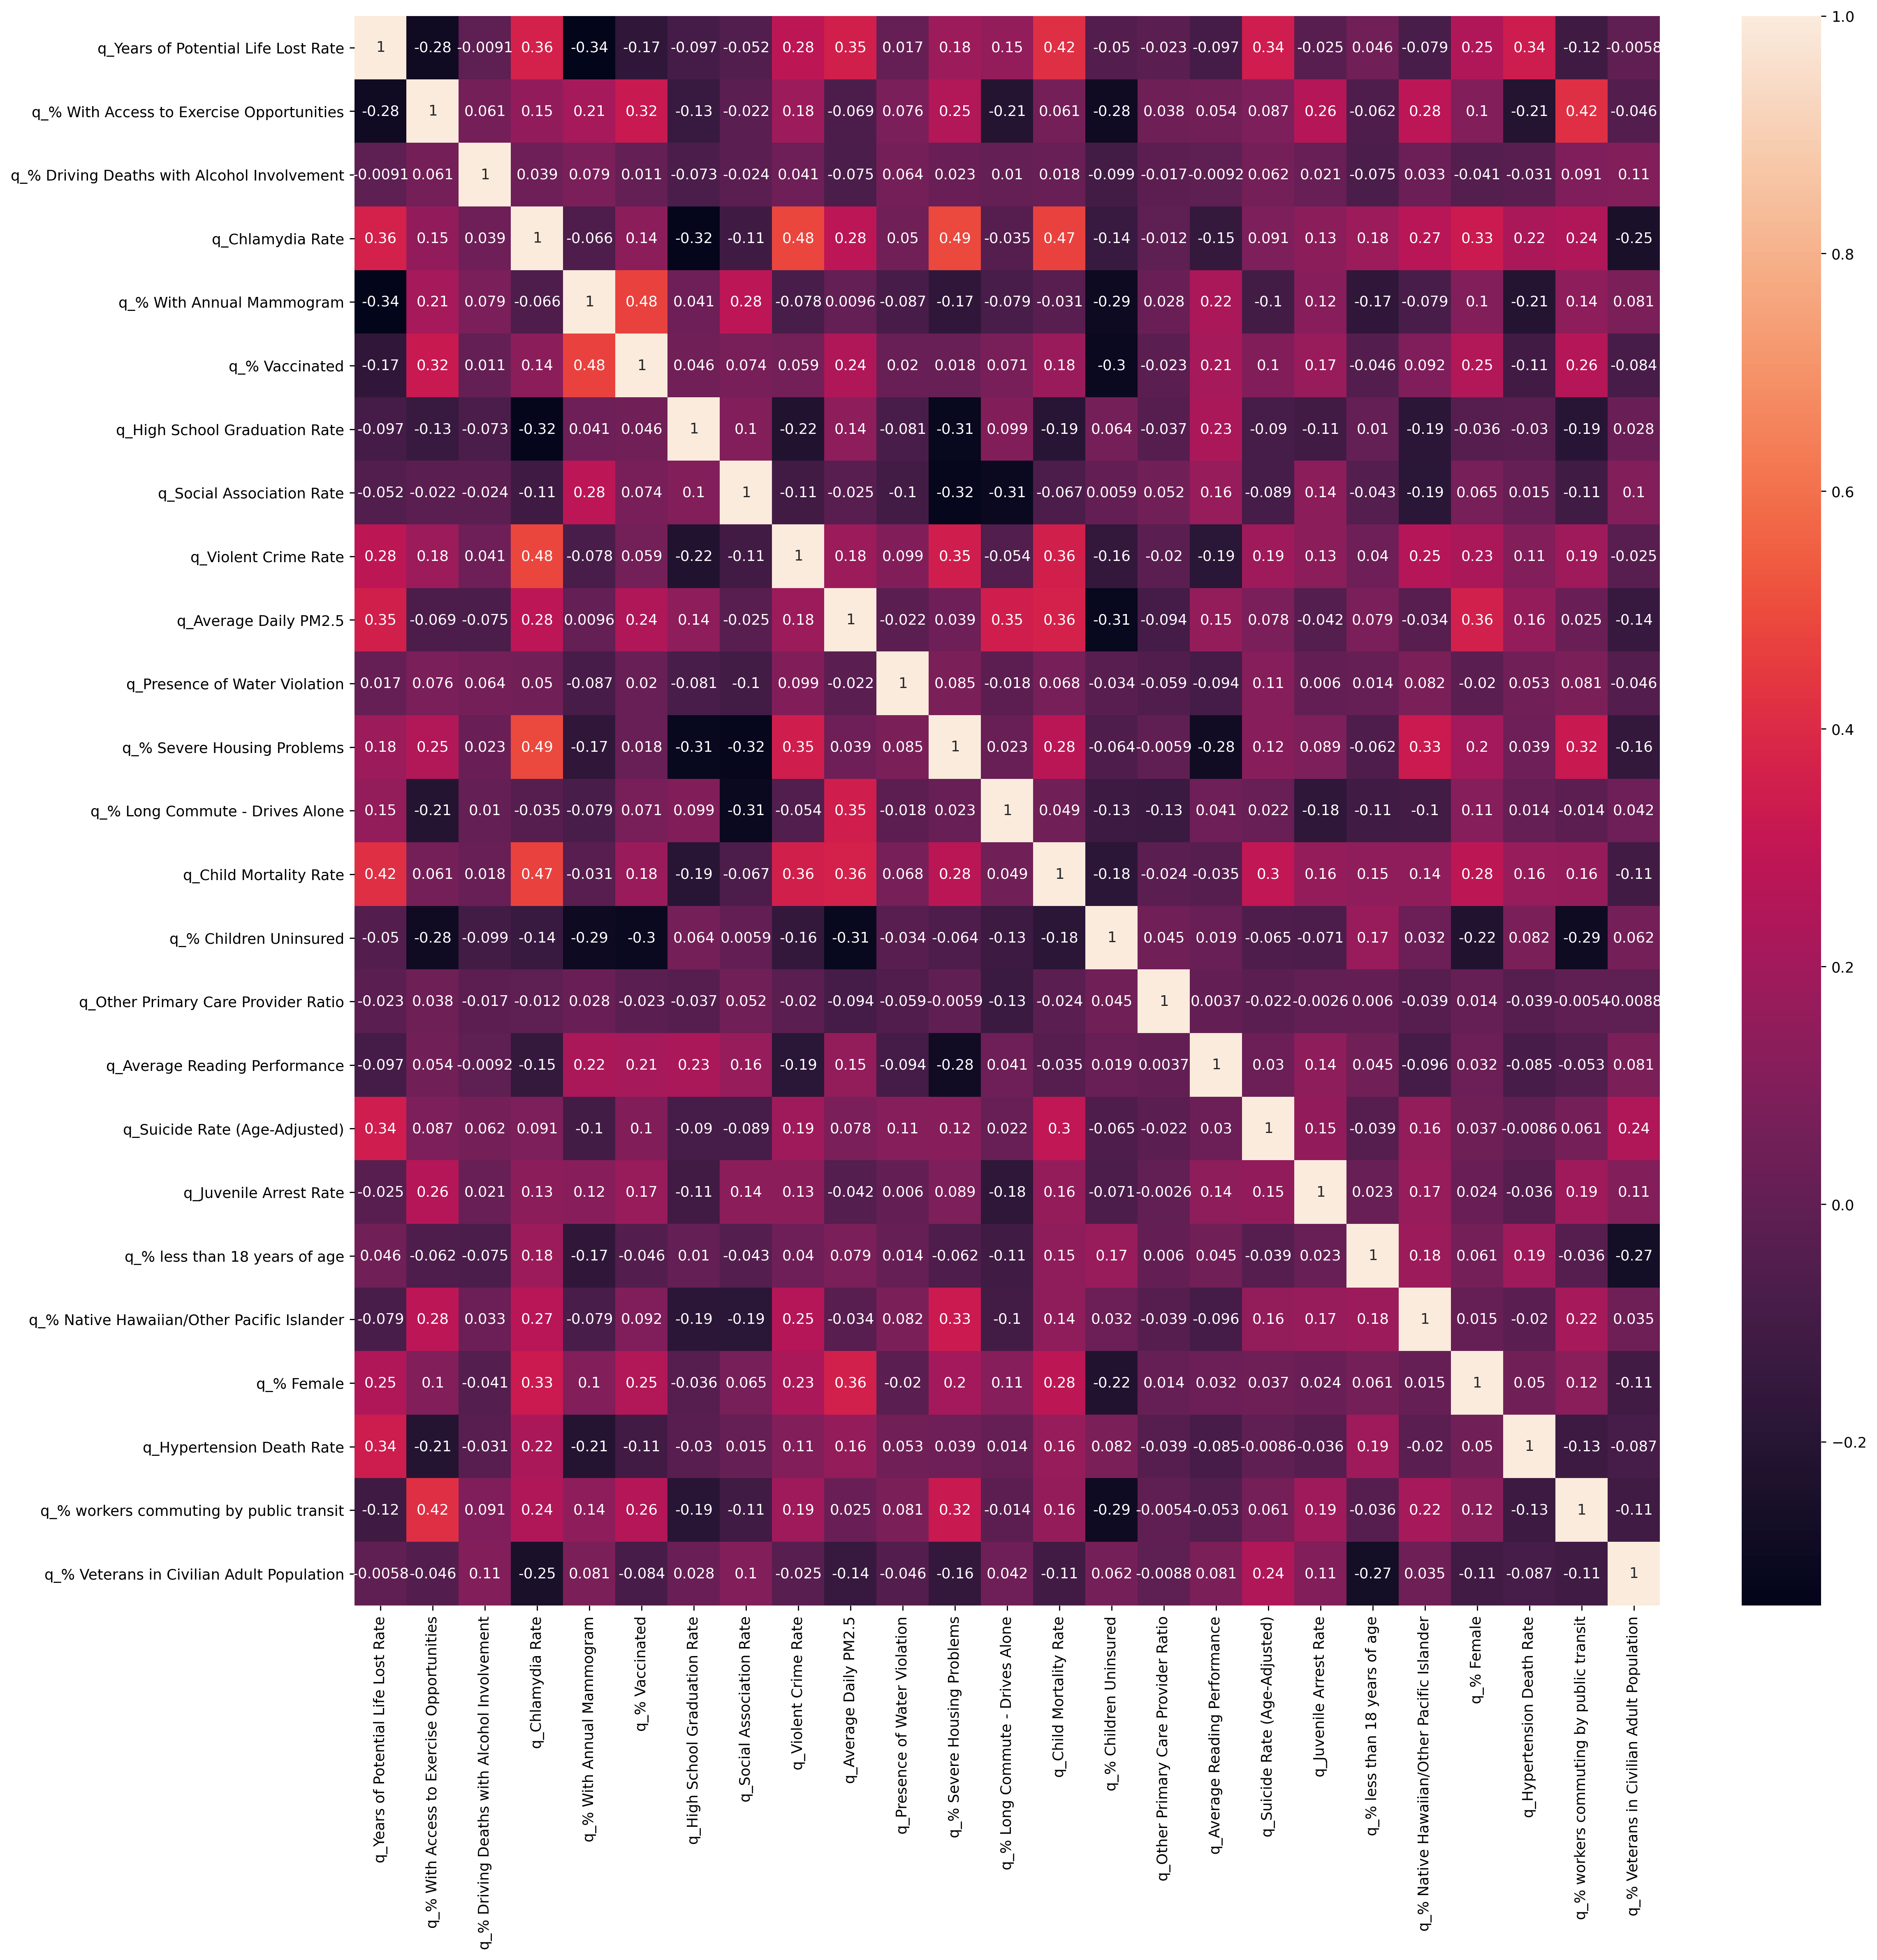

In [24]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=[20,20],dpi=256)
sn.heatmap(X_red_corr, annot=True)
# plt.savefig('heatmap.png')
plt.show()

## Predictive Power heatmap

In [31]:
import ppscore as pps
import matplotlib.pyplot as plt
plt.figure(figsize=[20,20],dpi=400)
a = pps.matrix(X_red).pivot(columns='x', index='y', values='ppscore')
sns.heatmap(a, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.savefig('predictive_power_heatmap.png')
plt.show()

# Kmeans

In [160]:
model=  KMeans(
               n_clusters=2,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )
model.fit(X_red)
label=pd.DataFrame(model.labels_)
X_red['class']=label
# file['class']=label
# file.dropna(inplace=True)
# print(file['class'].value_counts())
# X_red.to_csv('../data/q3_cluster.csv')

In [161]:
(model.cluster_centers_)

array([[0.36640618, 0.49276727, 0.51335547, 0.35420619, 0.58678469,
        0.51525838, 0.57684386, 0.56478642, 0.37993551, 0.43337959,
        0.47554484, 0.36713661, 0.4685909 , 0.39177102, 0.52271181,
        0.51569504, 0.56922143, 0.44008198, 0.5099334 , 0.47868869,
        0.42732125, 0.42827361, 0.43314674, 0.46359244, 0.54785213,
        1.97810734],
       [0.61061604, 0.50582741, 0.48911366, 0.62084837, 0.42955826,
        0.48830652, 0.43739845, 0.44703139, 0.5995369 , 0.55631088,
        0.52030763, 0.61013875, 0.5270875 , 0.58981662, 0.4809453 ,
        0.48784103, 0.44263874, 0.54975075, 0.49197854, 0.51754096,
        0.55990001, 0.55986712, 0.5555463 , 0.53001351, 0.46060004,
        0.5530303 ]])

In [162]:
label=pd.DataFrame(model.labels_)

In [163]:
label

0
0     1
1     0
2     1
3     1
4     1
...  ..
3127  1
3128  1
3129  0
3130  0
3131  0

[3132 rows x 1 columns]

In [164]:
X_red.shape

(3132, 26)

## Using predicted labels as class column for supervised feature importance score and cluster analysis

In [165]:
X_red['class']=label

In [166]:
X_red.dropna(inplace=True)

In [167]:
X_red['class'].unique()

array([1., 0.])

In [168]:
X1=X_red.drop(['class'],axis=1)

In [169]:
y1=X_red['class']

In [170]:
y1.isnull().sum()

0

### To install required package if missing

In [171]:
# !pip install xgboost

<AxesSubplot:>

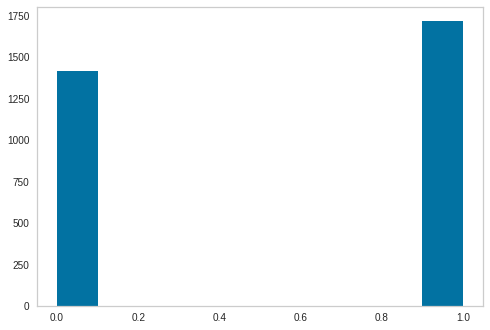

In [172]:
#class distribution
y1.hist(grid=False)

In [173]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X1, y1)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [174]:
print(model.feature_importances_)


[0.08920582 0.02350314 0.0245764  0.14830561 0.06550261 0.02727101
 0.03533082 0.03219771 0.04877348 0.03063408 0.02932475 0.07105336
 0.02211923 0.03495872 0.03414346 0.02078507 0.03408905 0.03053169
 0.03527224 0.02693679 0.03062989 0.03092687 0.02689555 0.0248387
 0.02219391]


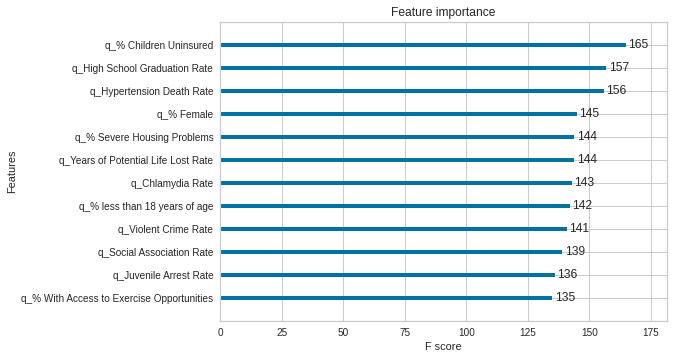

In [175]:
from xgboost import plot_importance
from matplotlib import pyplot

# No of top important features to show type=integer
top_n_features=12

plot_importance(model,max_num_features=top_n_features)
pyplot.show()

In [176]:
from sklearn.metrics import classification_report as clf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [177]:
from sklearn.ensemble import ExtraTreesClassifier
test_model=ExtraTreesClassifier()

test_model.fit(X_train,y_train)

y_pred = test_model.predict(X_test)
print(clf(y_test, y_pred))


# Cluster Distribution as per death column and some others

## Scatter Plot

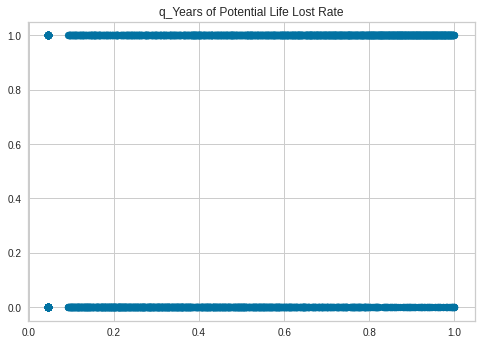

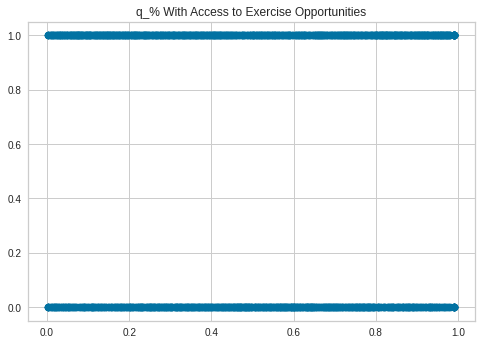

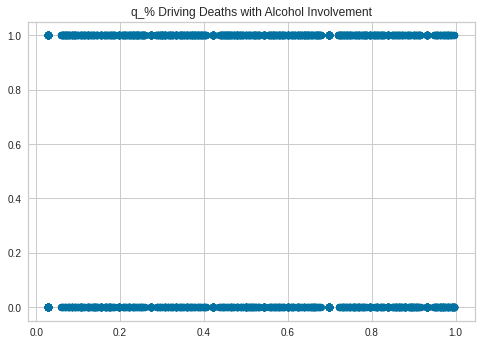

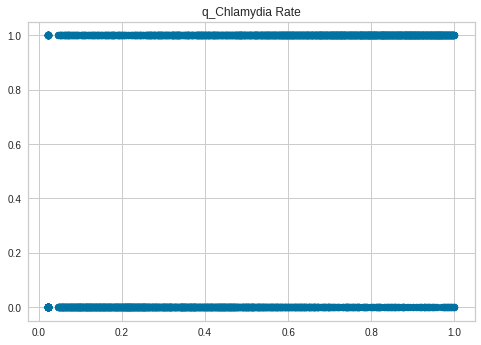

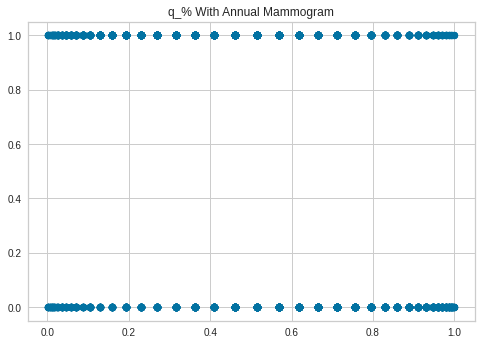

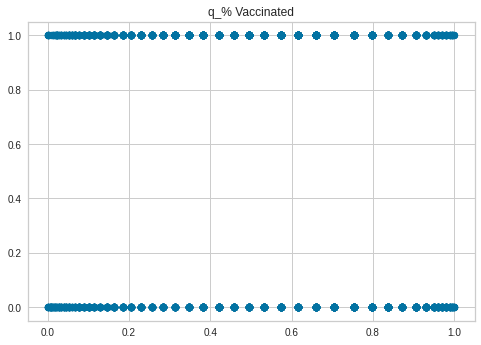

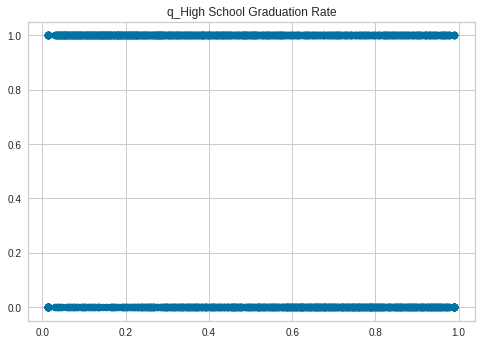

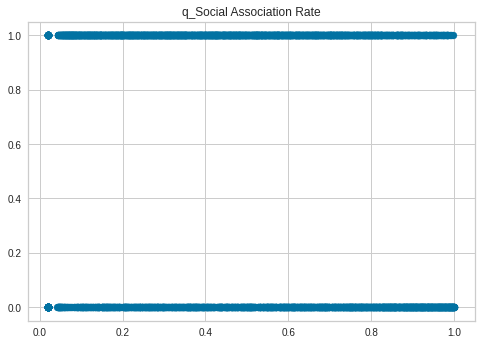

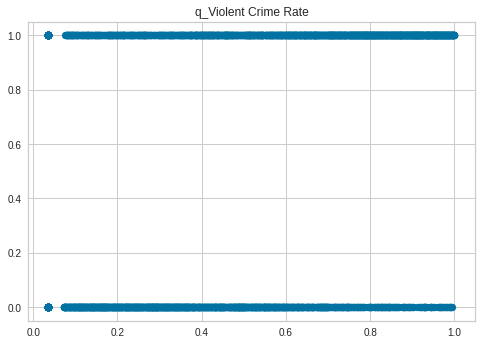

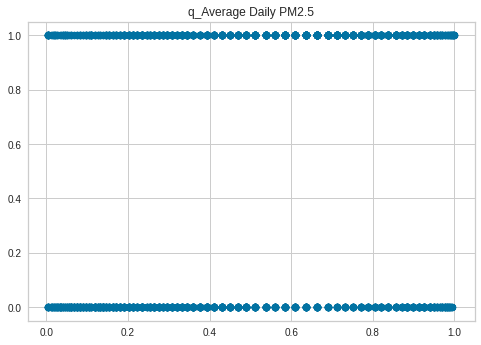

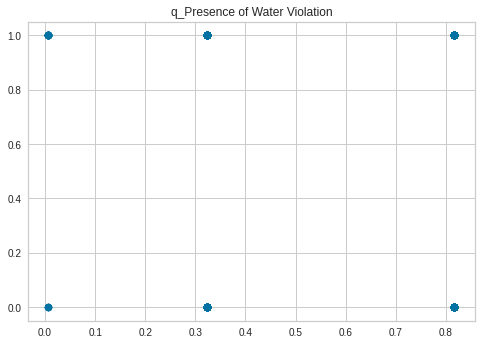

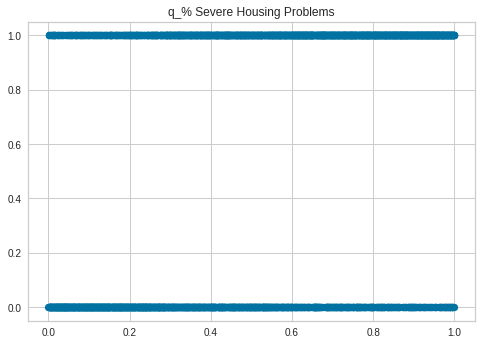

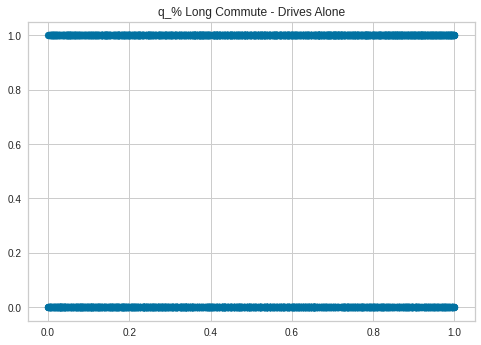

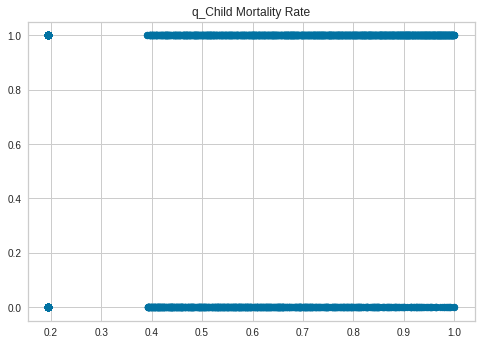

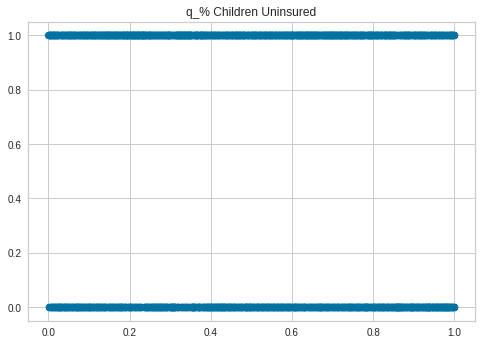

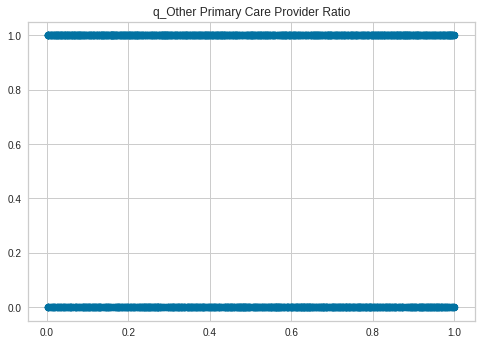

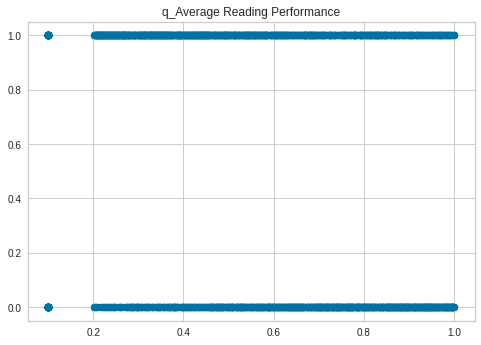

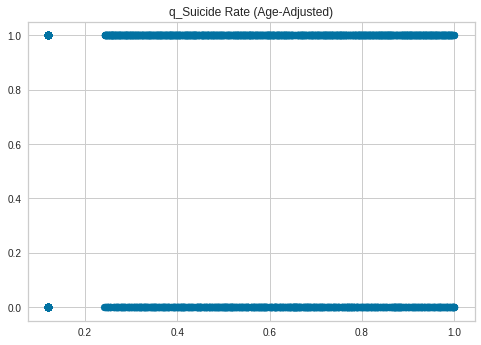

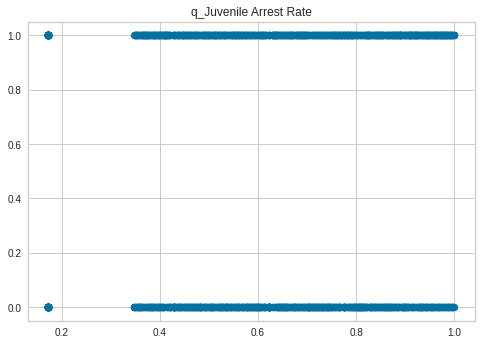

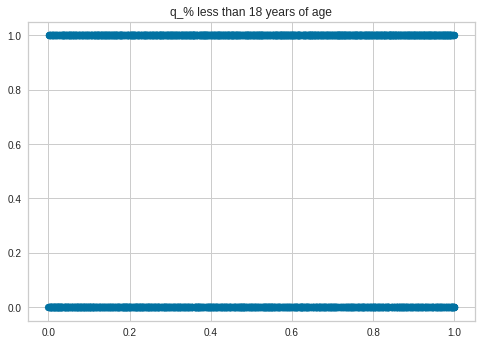

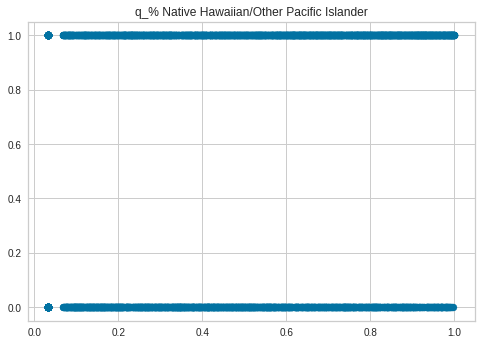

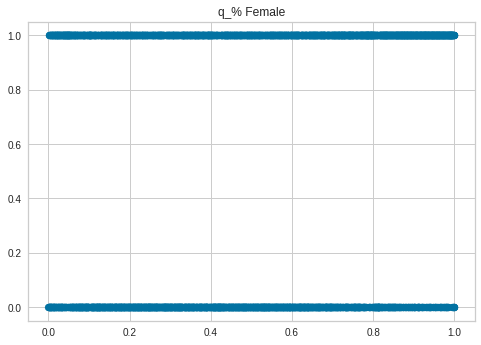

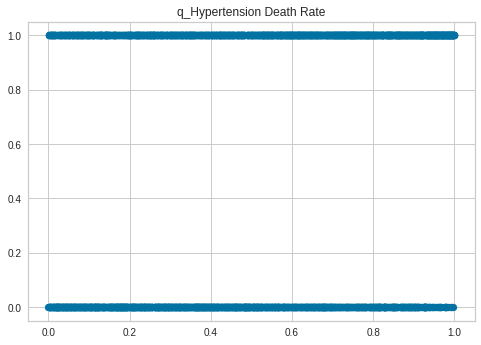

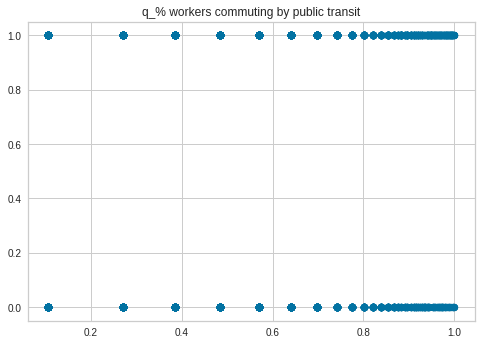

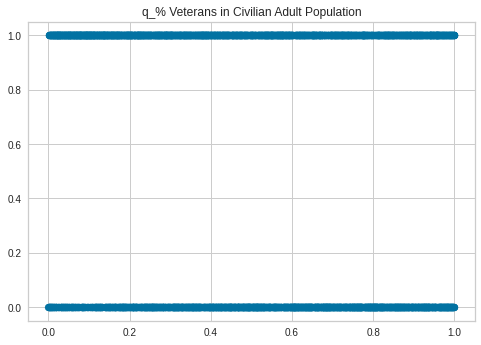

In [117]:
# to supress warnings
import warnings
warnings.simplefilter(action='ignore')

for i in X1.columns:
    plt.figure(frameon=True,)
    plt.scatter(X1[i],y1)
    plt.title(i)
#     plt.savefig(str(i)+".png")

## Violet plot

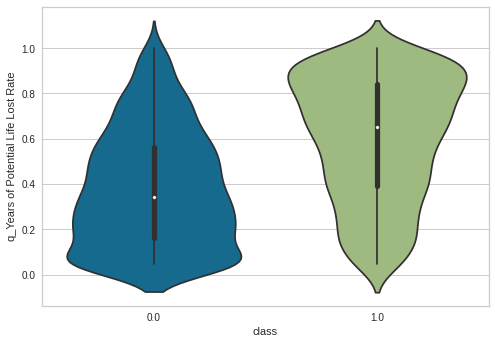

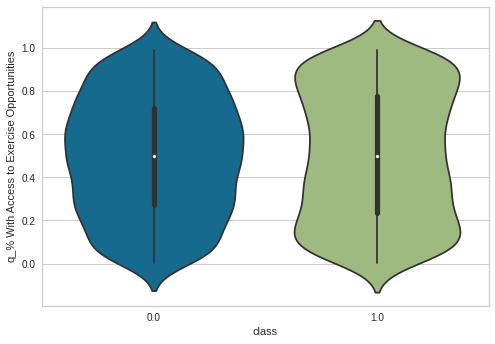

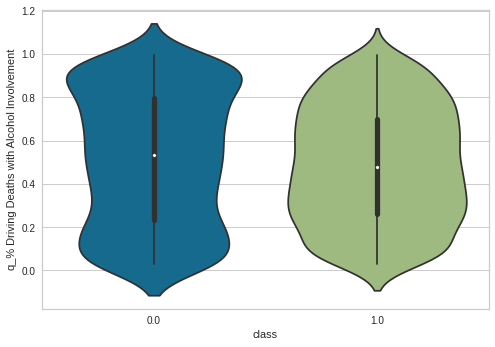

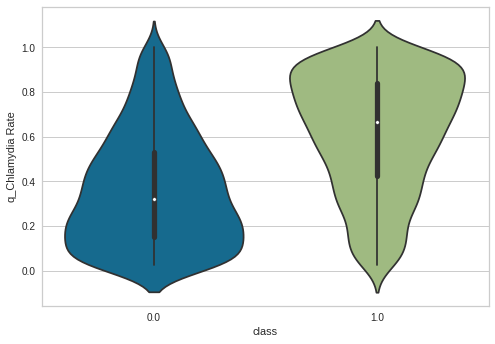

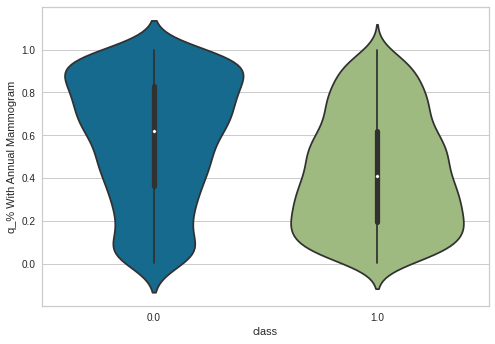

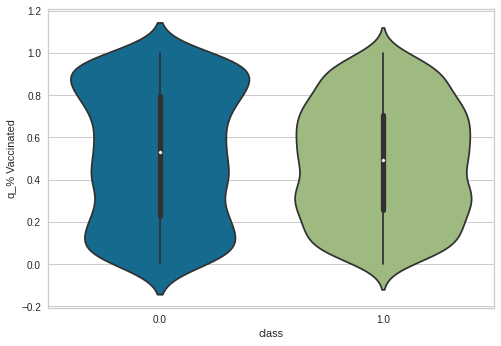

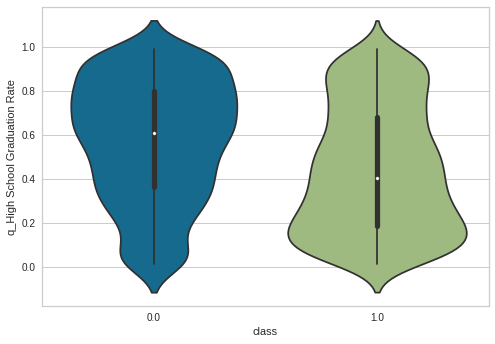

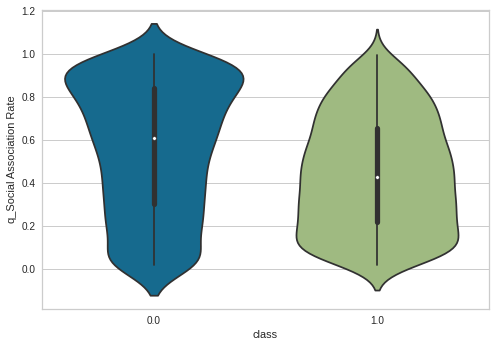

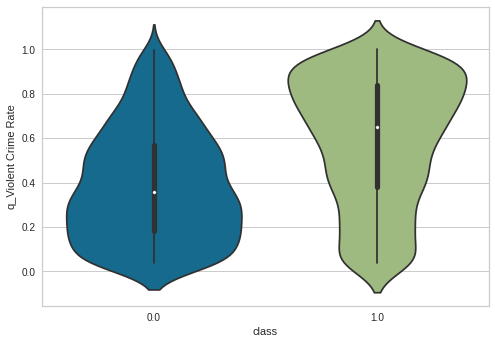

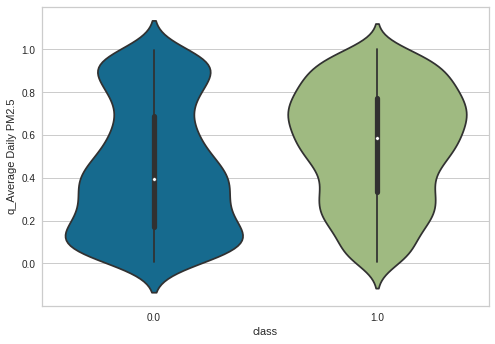

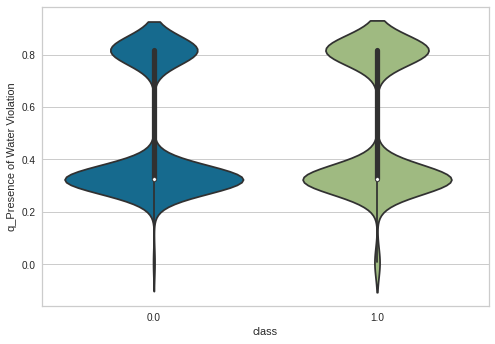

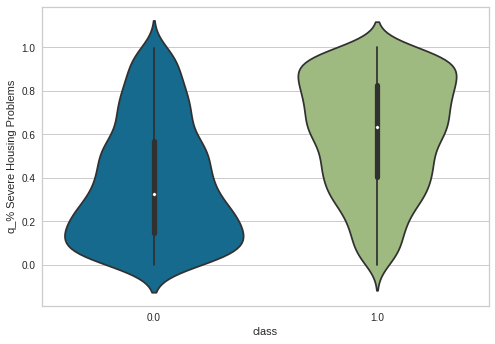

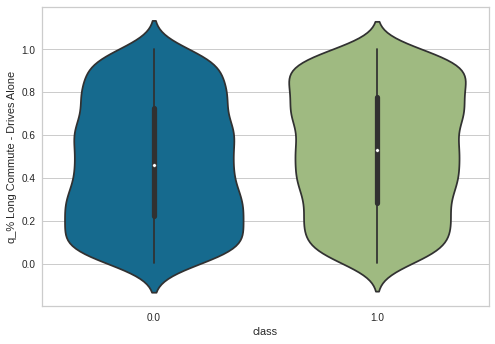

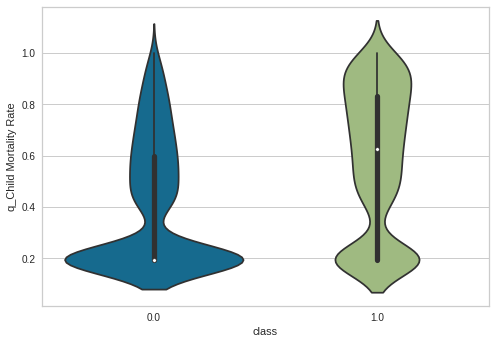

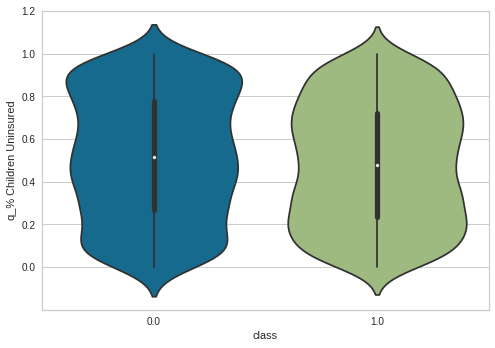

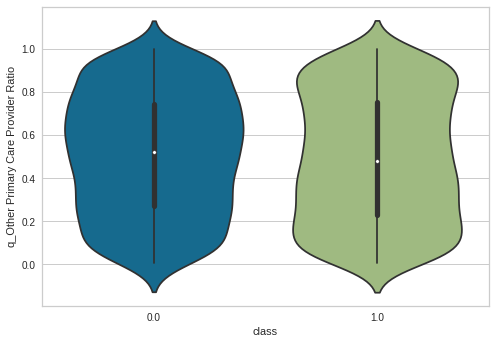

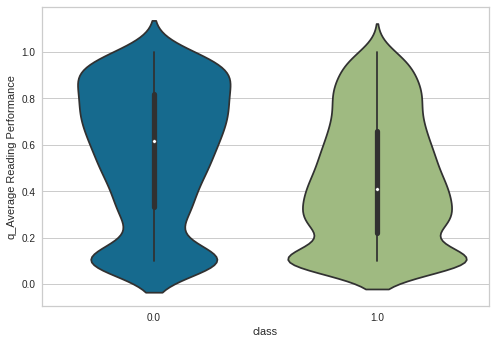

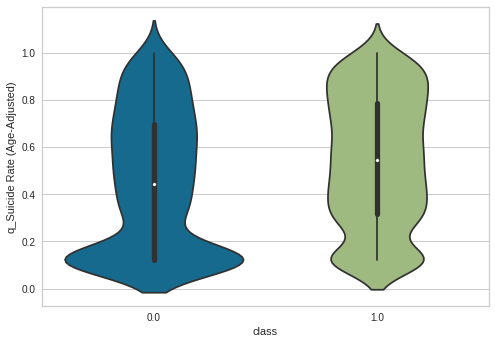

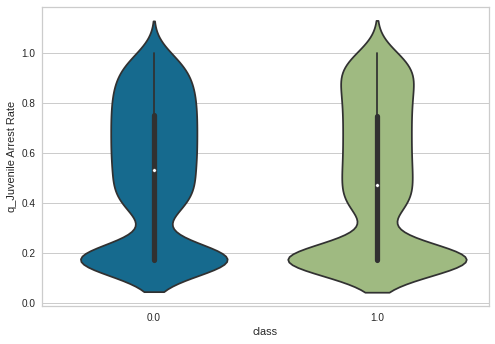

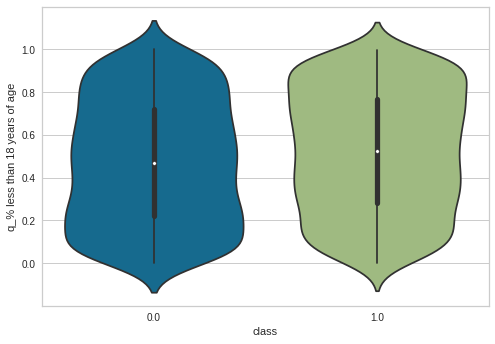

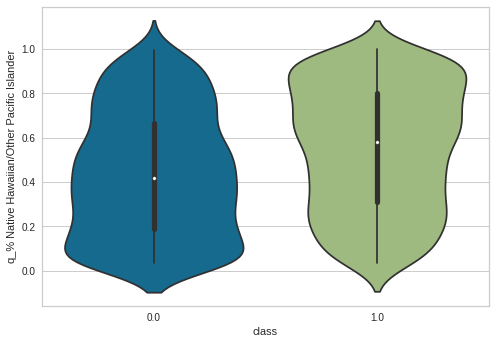

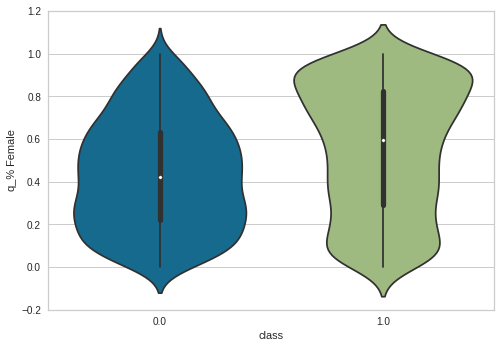

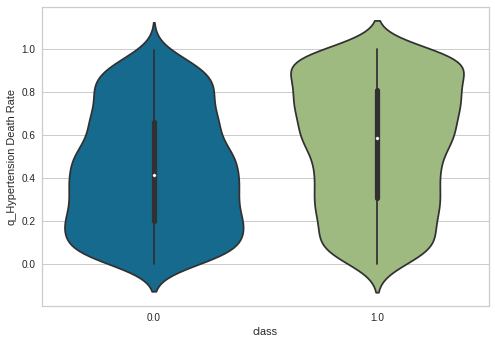

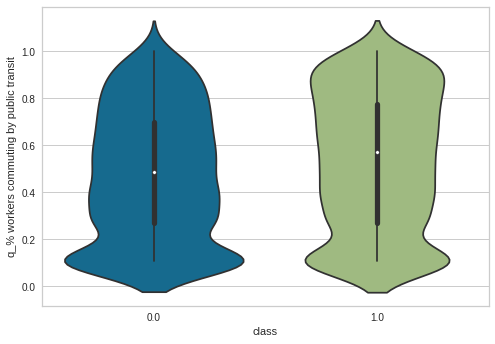

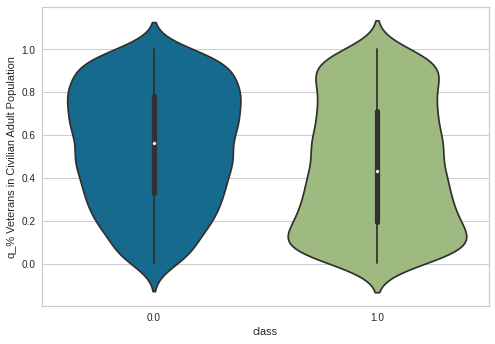

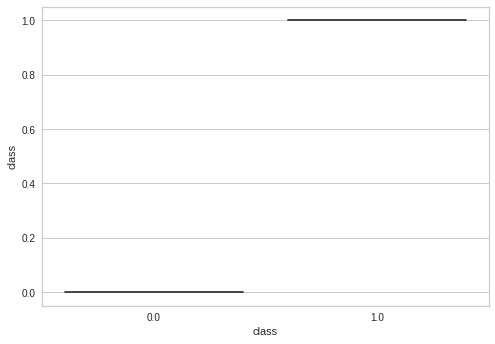

In [118]:
import seaborn as sns


for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x='class',y=X_red[i],data=X_red)
#     plt.savefig(str(i)+".png")

## Box Plot

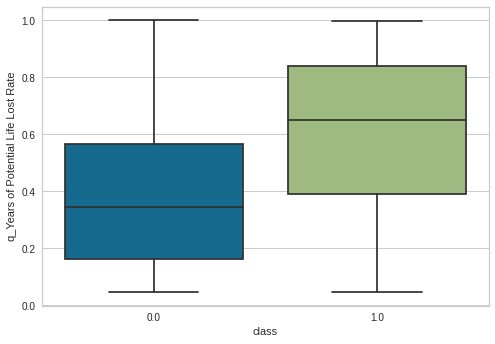

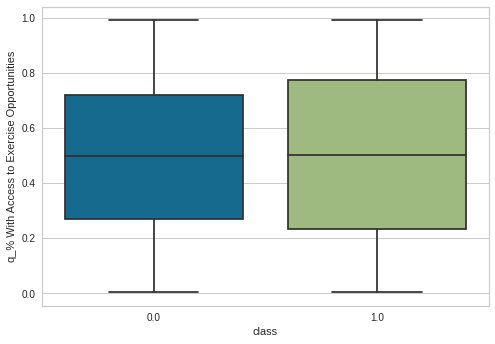

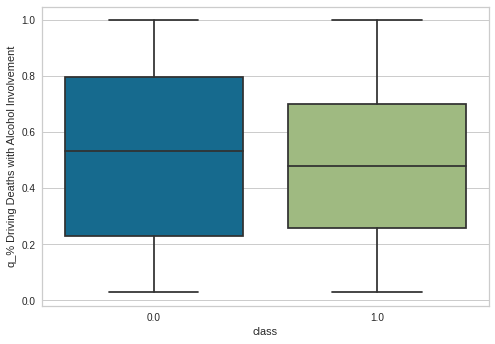

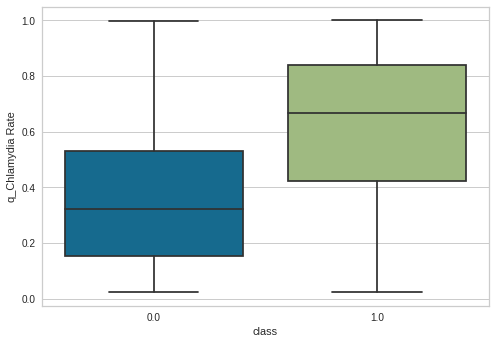

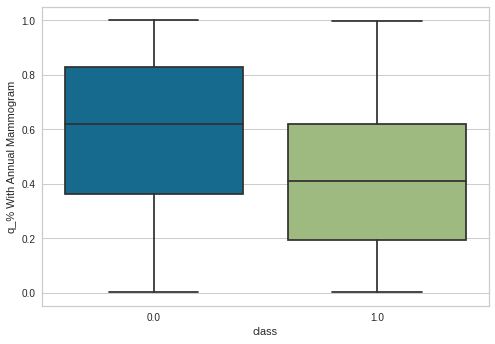

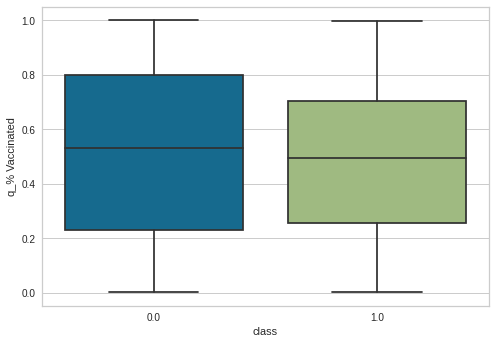

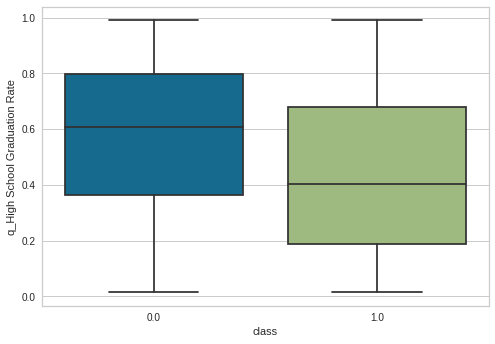

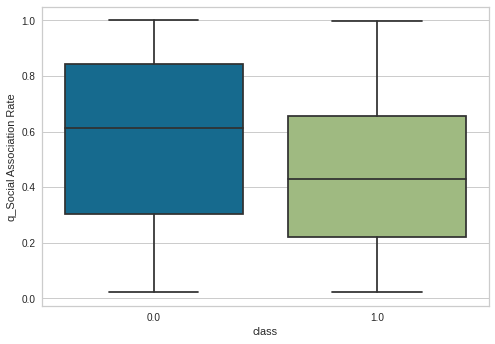

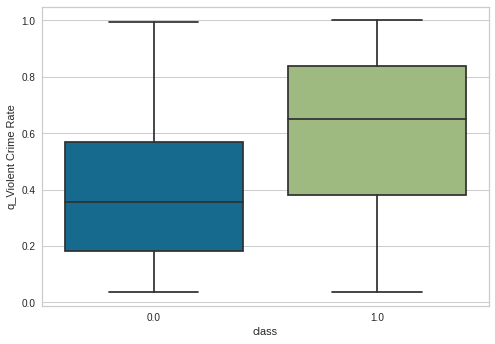

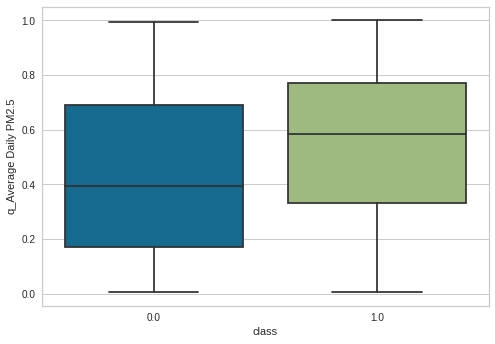

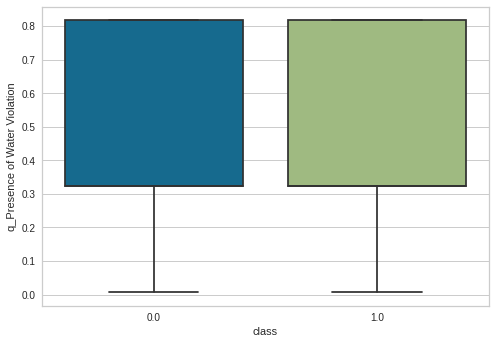

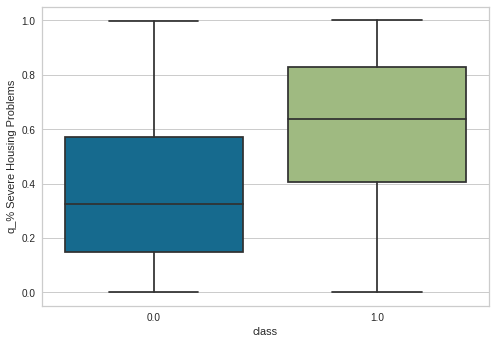

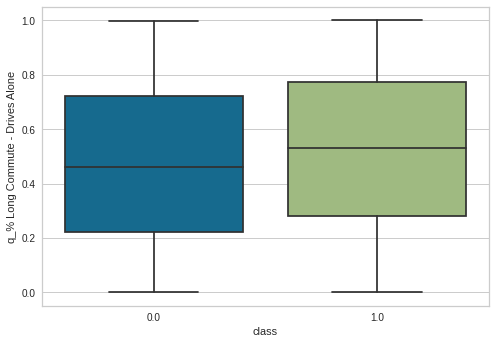

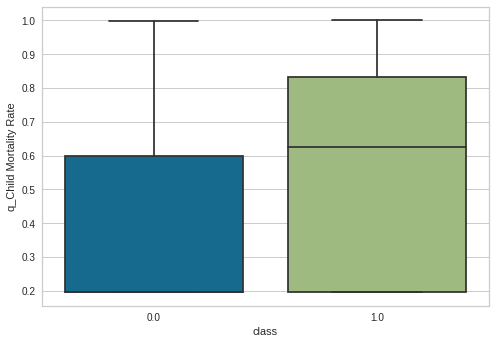

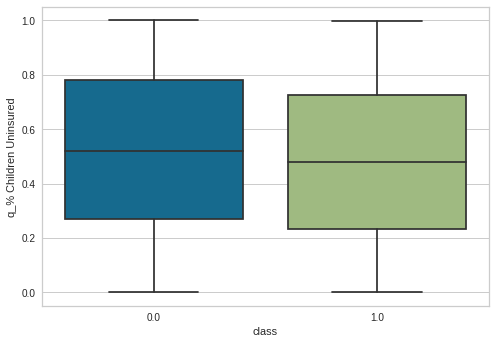

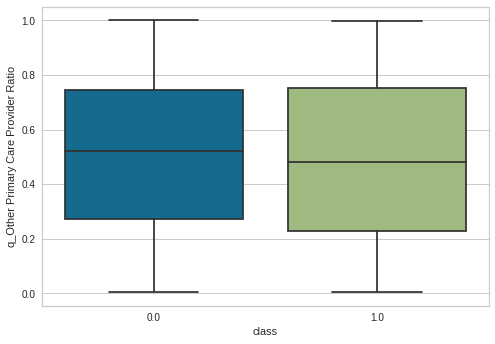

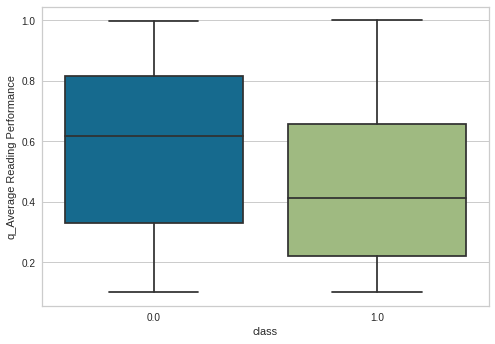

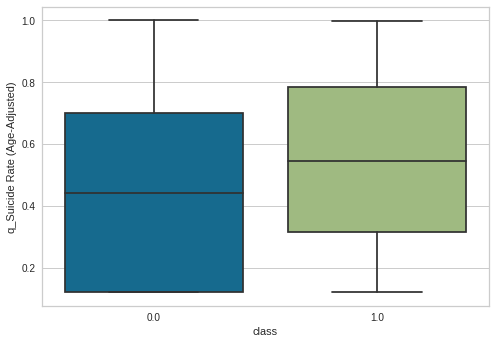

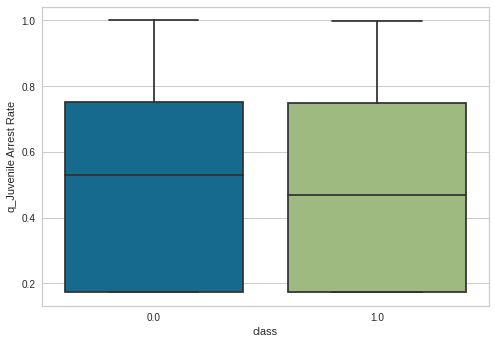

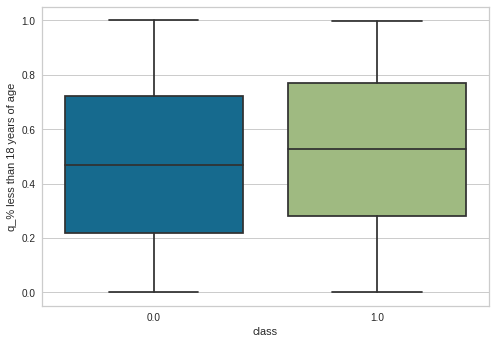

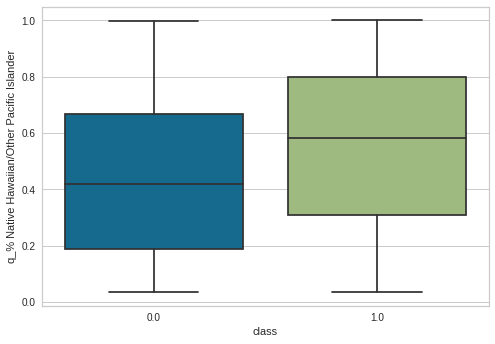

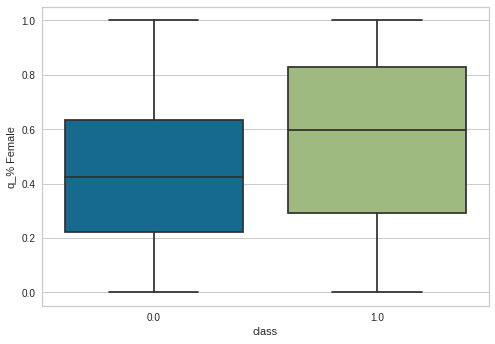

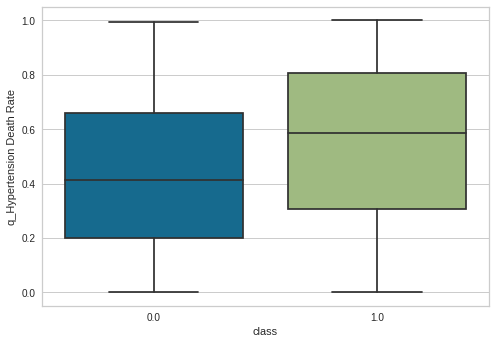

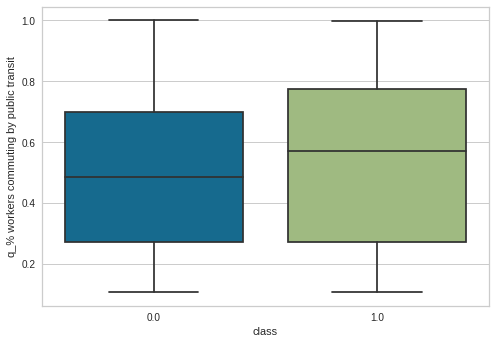

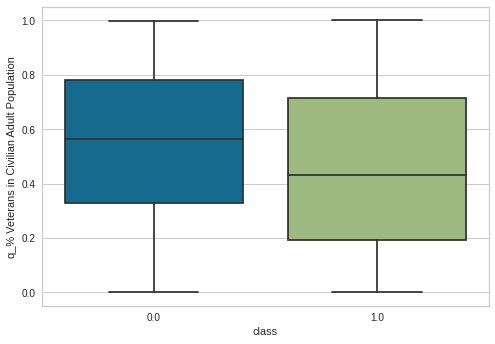

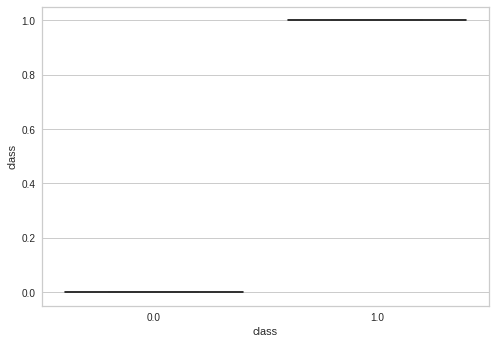

In [119]:
for i in X_red.columns:
    try:
        plt.figure(frameon=True,)
        sns.boxplot(x='class',y=X_red[i],data=X_red)
#         plt.savefig(str(i)+".png")
    except:
        pass

# Elbow method for number of clusters


Cluster 2 Inertia 6092.394592007877
Cluster 3 Inertia 5724.584621706735
Cluster 4 Inertia 5408.71600570895
Cluster 5 Inertia 5247.153170819836
Cluster 6 Inertia 5107.214846815227
Cluster 7 Inertia 4994.051347951157
Cluster 8 Inertia 4897.831339206938
Cluster 9 Inertia 4821.992468284861
Cluster 10 Inertia 4752.558288973988
Cluster 11 Inertia 4684.651042731782
Cluster 12 Inertia 4627.088242508722
Cluster 13 Inertia 4562.5426492044335
Cluster 14 Inertia 4507.077142863432


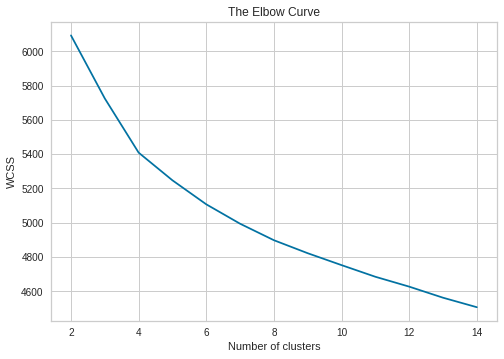

In [120]:
wcss = []  #Within-Cluster-Sum-of-Squares

for i in range(2,15):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_red)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(2,15),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

# Silhoutte Score

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [123]:
X=X_red

No. Clusters: 2, Silhouette Score: 0.147, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.113, Change from Previous Cluster: -0.034
No. Clusters: 4, Silhouette Score: 0.103, Change from Previous Cluster: -0.01
No. Clusters: 5, Silhouette Score: 0.098, Change from Previous Cluster: -0.005
No. Clusters: 6, Silhouette Score: 0.089, Change from Previous Cluster: -0.009
No. Clusters: 7, Silhouette Score: 0.083, Change from Previous Cluster: -0.006
No. Clusters: 8, Silhouette Score: 0.071, Change from Previous Cluster: -0.012
No. Clusters: 9, Silhouette Score: 0.071, Change from Previous Cluster: 0.0
No. Clusters: 10, Silhouette Score: 0.065, Change from Previous Cluster: -0.006
No. Clusters: 11, Silhouette Score: 0.068, Change from Previous Cluster: 0.003
No. Clusters: 12, Silhouette Score: 0.066, Change from Previous Cluster: -0.002
No. Clusters: 13, Silhouette Score: 0.067, Change from Previous Cluster: 0.001
No. Clusters: 14, Silhouette Score: 0.066, Change from Pr

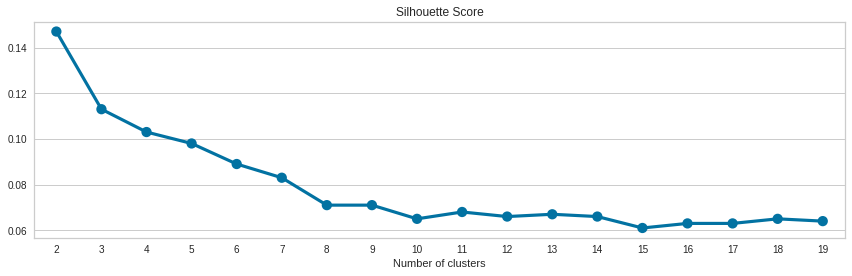

In [124]:
import seaborn as sns
from sklearn.metrics import silhouette_score
n_clu = []
km_ss = []

start=2
end=20
# Create a for loop to find optimal n_clusters
for n_clusters in range(start,end):

    # Create cluster labels
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X)

    silhouette_avg = round(silhouette_score(X, labels, random_state=1), 3)

    # Append score to lists
    km_ss.append(silhouette_avg)
    n_clu.append(n_clusters)

    print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
        n_clusters, silhouette_avg, (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

    # Plot graph at the end of loop
    if n_clusters == end - 1:
        plt.figure(figsize=(12,4))

        plt.title('Silhouette Score')
        plt.xlabel("Number of clusters")
        sns.pointplot(x=n_clu, y=km_ss)
        plt.tight_layout()
        plt.show()

## Silhoutte Score plot

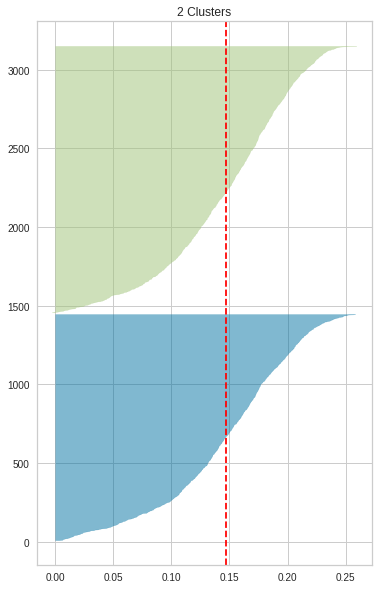

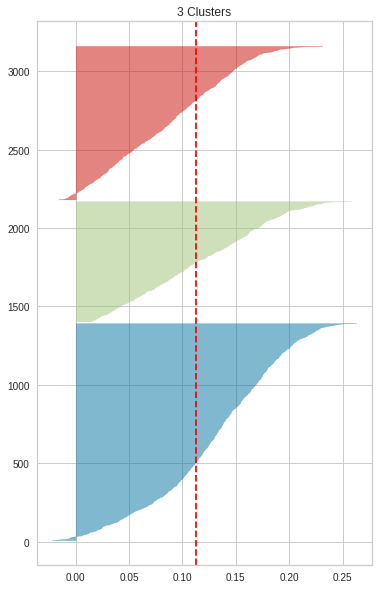

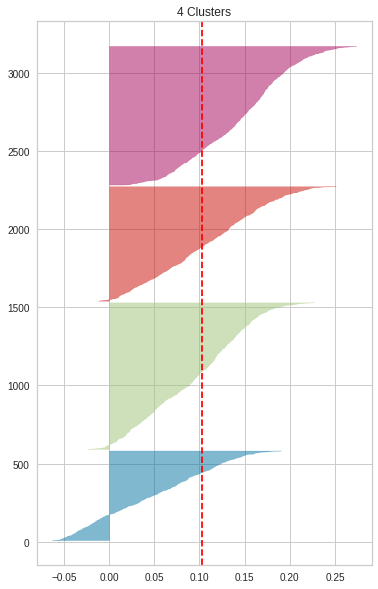

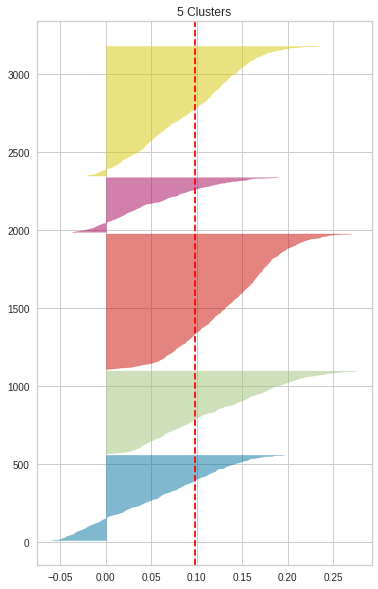

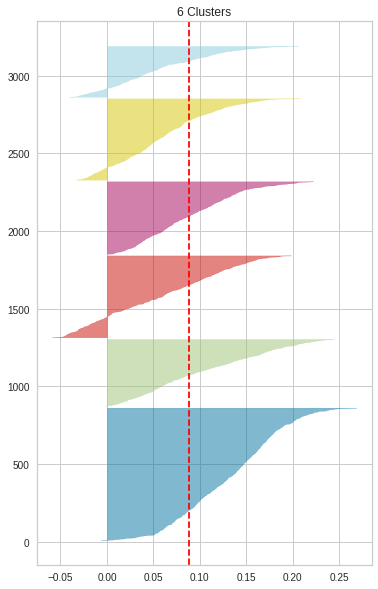

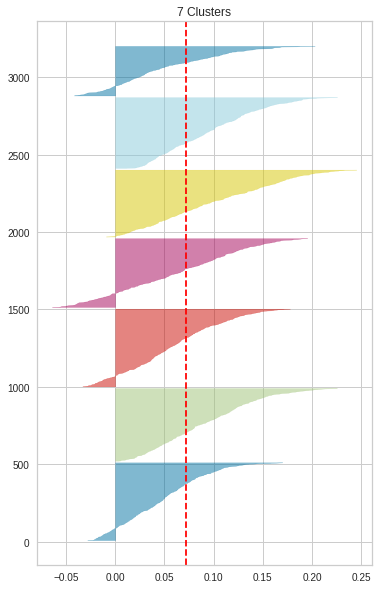

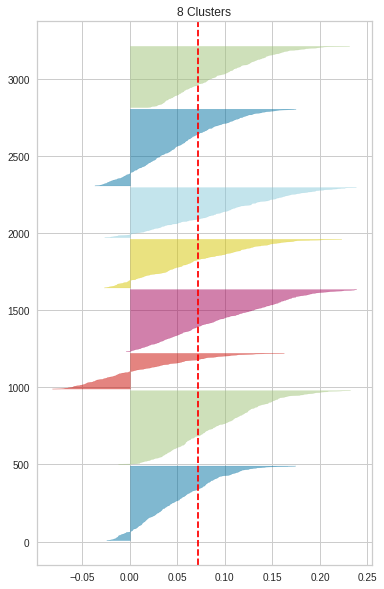

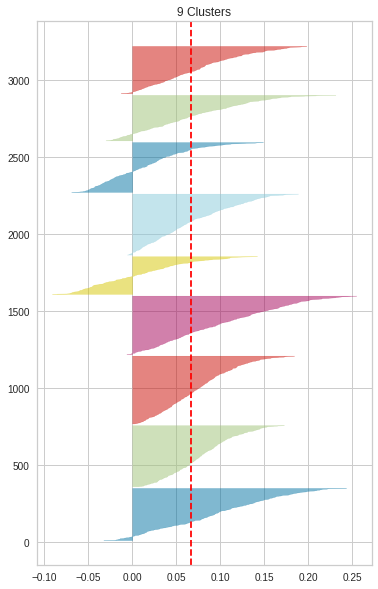

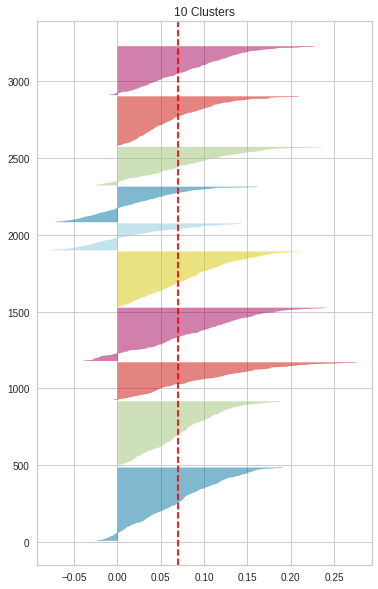

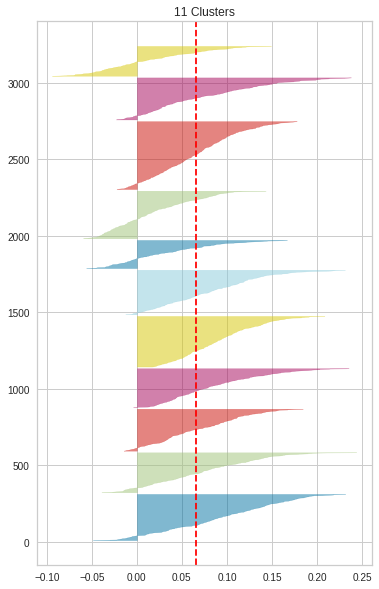

In [125]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,12):
    plt.figure(figsize=(6,10))
    plt.title(str(i)+" Clusters")
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(X)

## Here N_cluster=2 is the best choice available due to following reasons:


* The width of both the cluster is same
* Both of them are above average silhouette score
* No negative values as other clusters meaning that points are not assigned to any incorrect cluster

# Davies_bouldin_score

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [69]:
from sklearn.metrics import davies_bouldin_score
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score=davies_bouldin_score(X, labels)
    print("Cluster", i, "Davis Score", score)

Cluster 2 Davis Score 1.5148582267541195
Cluster 3 Davis Score 1.986188418553952
Cluster 4 Davis Score 2.0781440899000767
Cluster 5 Davis Score 2.4996426036893524
Cluster 6 Davis Score 2.7083832818176155
Cluster 7 Davis Score 2.8264207275797584
Cluster 8 Davis Score 3.0776829413449955
Cluster 9 Davis Score 3.072315930495586


## The lowest value is 2 so n_cluster=2

# Calinski-Harabasz Index

The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).

The score is higher when clusters are dense and well separated.


In [70]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score=metrics.calinski_harabasz_score(X, labels)
    print("Cluster", i, "Calinski index", score)

Cluster 2 Calinski index 1327.5625525821238
Cluster 3 Calinski index 902.0608101833102
Cluster 4 Calinski index 764.9108652616482
Cluster 5 Calinski index 610.7367451430504
Cluster 6 Calinski index 515.8976831242575
Cluster 7 Calinski index 453.0190404386524
Cluster 8 Calinski index 405.16057204572434
Cluster 9 Calinski index 366.23167027839315


## The score is highest for value 2 so n_cluster=2